# Exploratory data analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import root_mean_squared_error


In [2]:
file_path = './data/rating_stats.csv'
df = pd.read_csv(file_path, delimiter=';')

pd.set_option('display.max_columns', None)

# Controllo delle prime righe del dataset per visualizzare i dati
df.head()

,id,player_name,player_id,fixture_id,league_round,rating,team_name,position,home_or_away,opponent_team,result,result_status,games_minutes,games_substitute,offsides,shots_total,shots_on,goals_total,goals_conceded,goals_assists,goals_saves,passes_total,passes_key,passes_accuracy,tackles_total,tackles_blocks,tackles_interceptions,duels_total,duels_won,dribbles_attempts,dribbles_success,dribbles_past,fouls_drawn,fouls_committed,cards_yellow,cards_red,penalty_won,penalty_committed,penalty_scored,penalty_missed,penalty_saved,rating_target
0,1,A. Barák,8779,390,1,0.0,Fiorentina,Midfielder,away,Parma,01-gen,D,0,VERO,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
1,2,A. Barák,8779,392,2,7.3,Fiorentina,Midfielder,home,Venezia,0 - 0,D,55,FALSO,0,2,2,0,0,0,0,19,3,17,2,1,0.0,6,2,1,0,2,0,0,0,0,0,0,0,0,0,5.5
2,3,A. Bastoni,8619,384,1,6.9,Inter,Defender,away,Genoa,02-feb,D,90,FALSO,0,0,0,0,0,0,0,72,2,65,2,0,0.0,8,5,0,0,0,1,1,0,0,0,0,0,0,0,6.5
3,4,A. Bastoni,8619,394,2,7.2,Inter,Defender,home,Lecce,2 - 0,W,90,FALSO,0,0,0,0,0,0,0,87,0,80,1,0,1.0,4,1,0,0,0,0,1,0,0,0,0,0,0,0,6.5
4,5,A. Bastoni,8619,404,3,7.5,Inter,Defender,home,Atalanta,4 - 0,W,61,FALSO,0,0,0,0,0,0,0,47,0,44,2,0,1.0,6,5,0,0,0,1,1,0,0,0,0,0,0,0,6.5


In [3]:
len(df)

2258

In [4]:
df[(df['rating'] > 0)]['rating'].describe()

count    1519.000000
mean        6.902897
std         0.534161
min         3.000000
25%         6.600000
50%         6.900000
75%         7.200000
max         9.900000
Name: rating, dtype: float64

In [5]:
df[(df['rating'] > 0) & (df['rating'] < 5.5) ]

,id,player_name,player_id,fixture_id,league_round,rating,team_name,position,home_or_away,opponent_team,result,result_status,games_minutes,games_substitute,offsides,shots_total,shots_on,goals_total,goals_conceded,goals_assists,goals_saves,passes_total,passes_key,passes_accuracy,tackles_total,tackles_blocks,tackles_interceptions,duels_total,duels_won,dribbles_attempts,dribbles_success,dribbles_past,fouls_drawn,fouls_committed,cards_yellow,cards_red,penalty_won,penalty_committed,penalty_scored,penalty_missed,penalty_saved,rating_target
1333,1330,M. Cancellieri,8389,427,5,5.2,Parma,Attacker,away,Lecce,02-feb,D,21,VERO,0,0,0,0,0,0,0,4,0,3,1,0,0.0,9,4,2,1,0,2,1,0,1,0,0,0,0,0,4.5
1416,1413,M. Keita,22848,419,4,4.7,Parma,Midfielder,home,Udinese,02-mar,L,18,VERO,0,0,0,0,0,0,0,6,0,5,0,0,0.0,3,0,0,0,0,0,2,2,1,0,0,0,0,0,4.0
1734,1731,P. Dawidowicz,8939,424,5,3.0,Verona,Defender,home,Torino,02-mar,L,20,FALSO,0,0,0,0,0,0,0,11,0,11,0,0,0.0,2,0,0,0,0,0,1,0,1,0,1,0,0,0,4.0
2024,2021,S. Scuffet,9062,412,4,5.3,Cagliari,Goalkeeper,home,Napoli,0 - 4,L,90,FALSO,0,0,0,0,4,0,1,27,0,20,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.5


In [6]:
df[(df['rating_target'] > 0)]['rating_target'].describe()

count    1428.000000
mean        6.003501
std         0.654606
min         3.000000
25%         5.500000
50%         6.000000
75%         6.500000
max         9.000000
Name: rating_target, dtype: float64

In [7]:
# differenza tra rating e rating target
df['rating_diff'] = df['rating'] - df['rating_target']

# Stats di base sulla differenza tra rating e rating target
diff_overall = df['rating_diff'].describe()

# Stats di base sulla differenza, raggruppata per ruolo (position)
diff_by_position = df.groupby('position')['rating_diff'].describe()

# Filtrare righe con rating_target > 0
filtered_df = df[(df['rating_target'] > 0)]
diff_filtered = filtered_df['rating_diff'].describe()

print(diff_overall)

count    2258.000000
mean        0.846988
std         1.316233
min        -1.000000
25%         0.000000
50%         0.600000
75%         1.100000
max         7.300000
Name: rating_diff, dtype: float64


In [8]:
print(diff_by_position)

            count      mean       std  min  25%  50%  75%  max
position                                                      
Attacker    527.0  1.051803  1.563252 -0.5  0.0  0.7  1.2  7.3
Defender    780.0  0.828077  1.156194 -1.0  0.0  0.7  1.2  7.0
Goalkeeper  297.0  0.277104  0.542219 -0.6  0.0  0.0  0.4  3.6
Midfielder  654.0  0.963303  1.447763 -0.3  0.0  0.7  1.2  7.3


In [9]:
print()

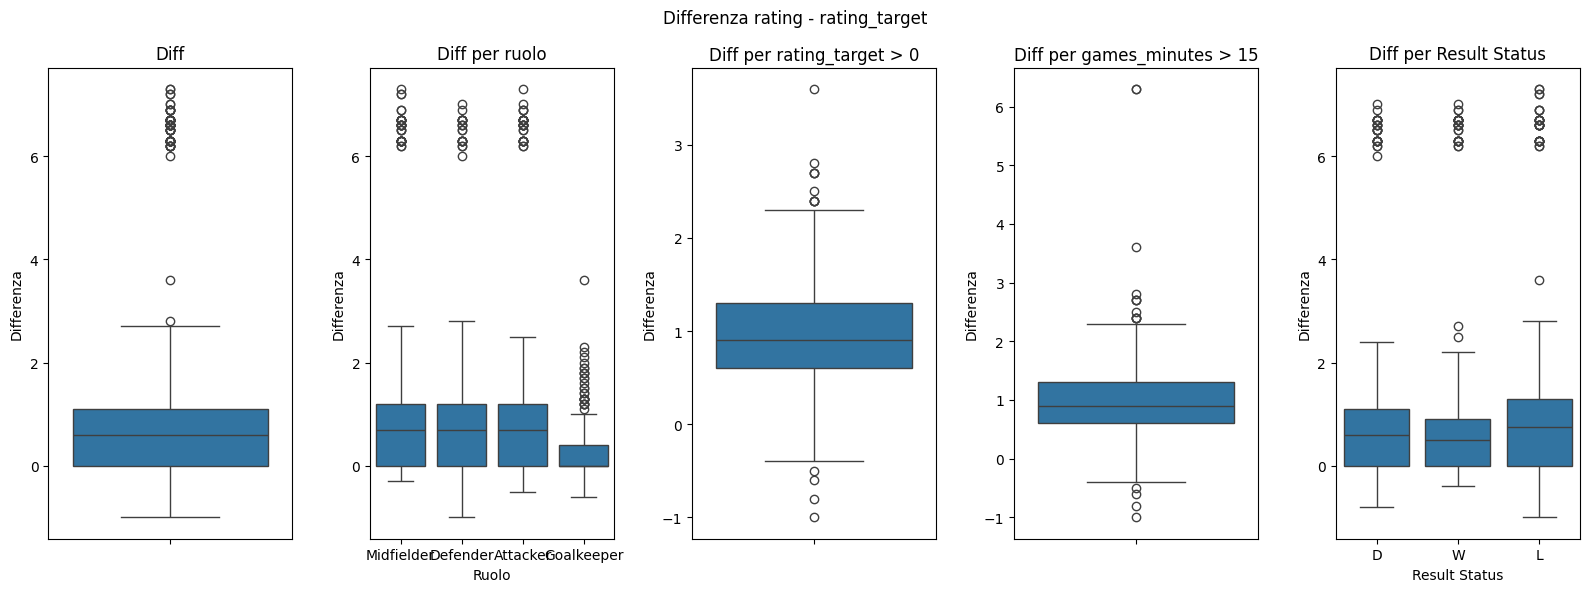

In [10]:
plt.figure(figsize=(16, 6))

plt.suptitle("Differenza rating - rating_target")

# Boxplot della differenza complessiva tra rating_target e rating
plt.subplot(1, 5, 1)
sns.boxplot(y=df['rating_diff'])
plt.title('Diff')
plt.ylabel('Differenza')

# Boxplot della differenza per ruolo (position)
plt.subplot(1, 5, 2)
sns.boxplot(x=df['position'], y=df['rating_diff'])
plt.title('Diff per ruolo')
plt.xlabel('Ruolo')
plt.ylabel('Differenza')

# Boxplot delle righe filtrate con rating_target > 0
filtered_df = df[df['rating_target'] > 0]
plt.subplot(1, 5, 3)
sns.boxplot(y=filtered_df['rating_diff'])
plt.title('Diff per rating_target > 0')
plt.ylabel('Differenza')

# Boxplot delle righe filtrate con games_minutes > 15
filtered_df = df[df['games_minutes'] > 15]
plt.subplot(1, 5, 4)
sns.boxplot(y=filtered_df['rating_diff'])
plt.title('Diff per games_minutes > 15')
plt.ylabel('Differenza')

# 5. Boxplot della differenza rispetto a result_status
plt.subplot(1, 5, 5)
sns.boxplot(x=df['result_status'], y=df['rating_diff'])
plt.title('Diff per Result Status')
plt.xlabel('Result Status')
plt.ylabel('Differenza')

plt.tight_layout()
plt.show()

In [11]:
# Perc di record con rating_diff > 1
print("% rec con rating_diff > 1: ", len(df[(abs(df['rating_diff']) > 1)]) / len(df) * 100)

# Perc di record con rating_diff >= 1
print("% rec con rating_diff >= 1: ", len(df[(abs(df['rating_diff']) >= 1)]) / len(df) * 100)

% rec con rating_diff > 1:  27.192205491585476
% rec con rating_diff >= 1:  32.28520814880425


In [12]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
#pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')

df[(df['rating_diff'] > 5.5)]


,id,player_name,player_id,fixture_id,league_round,rating,team_name,position,home_or_away,opponent_team,result,result_status,games_minutes,games_substitute,offsides,shots_total,shots_on,goals_total,goals_conceded,goals_assists,goals_saves,passes_total,passes_key,passes_accuracy,tackles_total,tackles_blocks,tackles_interceptions,duels_total,duels_won,dribbles_attempts,dribbles_success,dribbles_past,fouls_drawn,fouls_committed,cards_yellow,cards_red,penalty_won,penalty_committed,penalty_scored,penalty_missed,penalty_saved,rating_target,rating_diff
81,81,A. Dembélé,9248,424,5,6.2,Torino,Defender,away,Verona,02-mar,W,8,VERO,0,0,0,0,0,0,0,8,0,5,1,0,0.0,2,2,0,0,0,0,0,1,0,0,0,0,0,0,0.0,6.2
112,112,A. Gabrielloni,22766,409,3,6.3,Como,Attacker,away,Udinese,1 - 0,L,18,VERO,0,0,0,0,0,0,0,2,0,1,0,0,0.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,6.3
157,157,A. Makoumbou,9044,412,4,6.9,Cagliari,Midfielder,home,Napoli,0 - 4,L,13,VERO,0,0,0,0,0,0,0,19,0,16,2,0,0.0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0.0,6.9
160,160,A. Manzoni,8748,399,2,6.6,Atalanta,Midfielder,away,Torino,02-gen,L,14,VERO,0,0,0,0,0,0,0,12,0,11,0,0,0.0,3,2,0,0,0,1,1,0,0,0,0,0,0,0,0.0,6.6
194,194,A. Obert,8528,391,2,6.5,Cagliari,Defender,home,Como,01-gen,D,9,VERO,0,0,0,0,0,0,0,2,0,1,0,0,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,6.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096,2093,T. Kristensen,9083,409,3,6.3,Udinese,Defender,home,Como,1 - 0,W,18,VERO,0,0,0,0,0,0,0,2,0,1,0,0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,6.3
2106,2103,T. Noslin,8917,406,3,6.3,Lazio,Attacker,home,AC Milan,02-feb,D,8,VERO,0,0,0,0,0,0,0,1,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,6.3
2167,2163,W. Bondo,8879,428,5,6.7,Monza,Midfielder,home,Bologna,01-feb,L,9,VERO,0,0,0,0,0,0,0,7,0,7,3,0,0.0,4,3,1,0,0,0,0,0,0,0,0,0,0,0,0.0,6.7
2188,2184,Y. Adli,8711,423,5,6.7,Fiorentina,Midfielder,home,Lazio,02-gen,W,14,VERO,0,0,0,0,0,0,0,8,0,7,0,0,0.0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0.0,6.7


## Pearson Correlation

Misura la dipendenza lineare tra due variabili.

The resulting coefficient is a value between -1 and 1 inclusive, where:

- 1: Perfect positive linear correlation.
- 0: No linear correlation, the two variables most likely do not affect each other.
- -1: Perfect negative linear correlation.

In [13]:
correlation_matrix = df.corr(numeric_only=True)

# Ordina valori in base alla colonna 'rating_target'
correlation_sorted = correlation_matrix['rating_target'].sort_values(ascending=False)

print(correlation_sorted)

rating_target            1.000000
rating                   0.915503
games_minutes            0.831202
duels_total              0.653829
passes_total             0.635733
passes_accuracy          0.597479
duels_won                0.587930
fouls_committed          0.434722
tackles_total            0.433722
fouls_drawn              0.412946
shots_total              0.394198
passes_key               0.385800
dribbles_attempts        0.373224
tackles_interceptions    0.335091
shots_on                 0.321226
dribbles_past            0.315875
dribbles_success         0.311954
goals_total              0.256753
tackles_blocks           0.238157
cards_yellow             0.209361
goals_assists            0.196409
offsides                 0.173317
goals_saves              0.156851
goals_conceded           0.122879
penalty_scored           0.088856
id                       0.078354
penalty_won              0.076574
penalty_saved            0.052471
rating_diff              0.038989
penalty_commit

## Analisi residui 

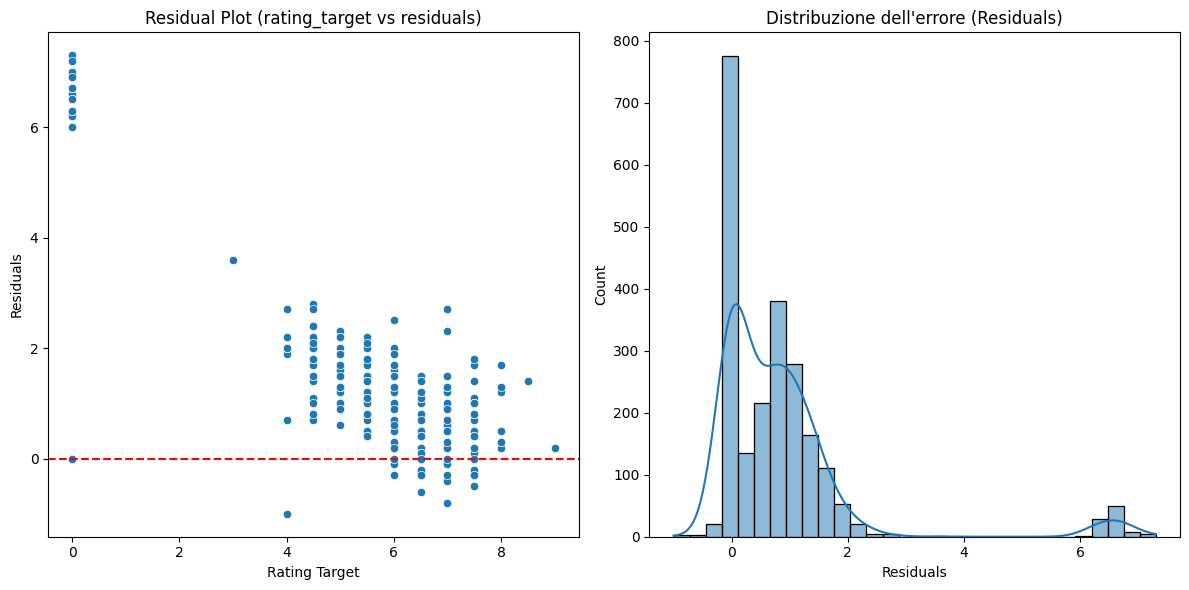

In [14]:
# 1. Residual Plot (Grafico dei residui)
plt.figure(figsize=(12, 6))

# Calcolare i residui (errore)
df['residuals'] = df['rating'] - df['rating_target']

# Residual plot: rating_target vs residui
plt.subplot(1, 2, 1)
sns.scatterplot(x=df['rating_target'], y=df['residuals'])
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot (rating_target vs residuals)')
plt.xlabel('Rating Target')
plt.ylabel('Residuals')

# 2. Distribuzione dell'errore
plt.subplot(1, 2, 2)
sns.histplot(df['residuals'], kde=True, bins=30)
plt.title('Distribuzione dell\'errore (Residuals)')
plt.xlabel('Residuals')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


## Rating e Rating target vs games_minutes

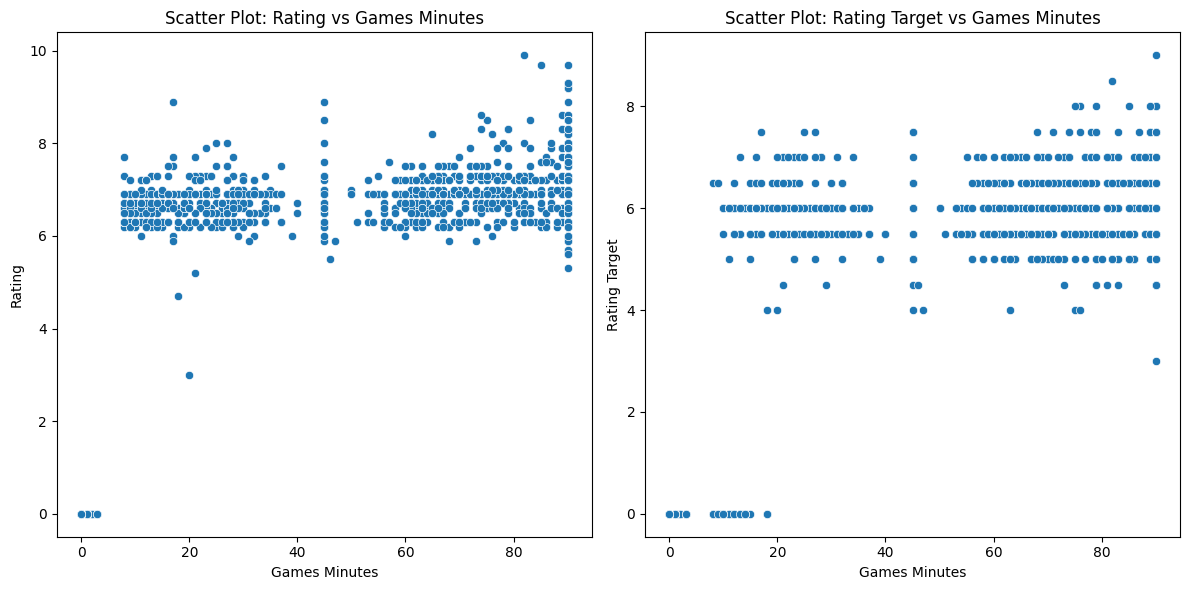

In [15]:
plt.figure(figsize=(12, 6))

# Scatter plot per rating rispetto a games_minutes
plt.subplot(1, 2, 1)
sns.scatterplot(x='games_minutes', y='rating', data=df)
plt.title('Scatter Plot: Rating vs Games Minutes')
plt.ylabel('Rating')
plt.xlabel('Games Minutes')

# Scatter plot per rating_target rispetto a games_minutes
plt.subplot(1, 2, 2)
sns.scatterplot(x='games_minutes', y='rating_target', data=df)
plt.title('Scatter Plot: Rating Target vs Games Minutes')
plt.ylabel('Rating Target')
plt.xlabel('Games Minutes')

plt.tight_layout()
plt.show()

### MAE e RMSE

In [16]:
# Errore medio assoluto (MAE)
mae = np.mean(np.abs(df['residuals']))
print(f'Mean Absolute Error (MAE): {mae:.2f}')

# Calcola l'RMSE
rmse = root_mean_squared_error(df['rating'], df['rating_target'])

print("RMSE:", rmse)

Mean Absolute Error (MAE): 0.86
RMSE: 1.564957544765233


**1. Mean Absolute Error (MAE): 0.85**
In media, le previsioni del modello si discostano dai valori reali di 0.85 punti. Questo indica un errore medio relativamente contenuto nelle previsioni, sun un rating che potenzialmente va da 0 a 10.

**2. Root Mean Square Error (RMSE): 1.57**
L'RMSE indica che in media, l'errore quadratico delle previsioni è di 1.57 punti. Questa metrica penalizza maggiormente gli errori più grandi a causa dell'elevamento al quadrato.
Quindi, sebbene ci siano alcune previsioni vicine ai valori reali, ci sono anche errori significativi che influenzano il risultato finale. Questo potrebbe indicare che il modello ha difficoltà a prevedere valori estremi o situazioni particolari.

**Confronto tra MAE e RMSE:**
Il MAE è generalmente più robusto e non è influenzato dagli outlier tanto quanto l'RMSE. Se il MAE è significativamente più basso dell'RMSE, potrebbe essere un segno di outlier nel tuo dataset.